# General example 
The purpose of this notebook is to introduce the basic usage of the package


In [1]:
import numpy as np
import ochunGRN as oGRN
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [8, 5]
def betterPrint(Dict): #Utils
    for k, v in Dict.items():
        if isinstance(v, dict):
            print(f"{k}:")
            for k2, v2 in v.items():
                print(f"\t{k2}: {v2}") 
        else :
            print(f"{k}: {v}")

### Graph Creation
The GRN is represented by a random graph using the Barabasi-Albert algorithm. 
The Graph is oriented following a tree descedent scheme.

The function `randomGrn()` take the number of simulated genes and ratio of auto-regulation and mutual-regulation. It gives a dictionnary of utils component for the dynamic simulation and topology description of the created graph.
The function `plotGraph()` shows the Graph.

In [2]:
GENESNB = 5
test = oGRN.randomGrn(GENESNB, 0.2, 0.1)
betterPrint(test)

Graph: DiGraph with 5 nodes and 7 edges
genesNb: 5
autoRG: 0.2
duoRG: 0.1
AdjMatrice: [[-1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0. -1.  1.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -1.]]
meanClustering: 0.0
subGraph:
	2-1-3: Fan-Out
	2-1-4: Fan-Out
	2-3-0: Cascade
	2-3-4: Fan-Out
	2-4-0: Cascade
	3-0-4: Fan-In


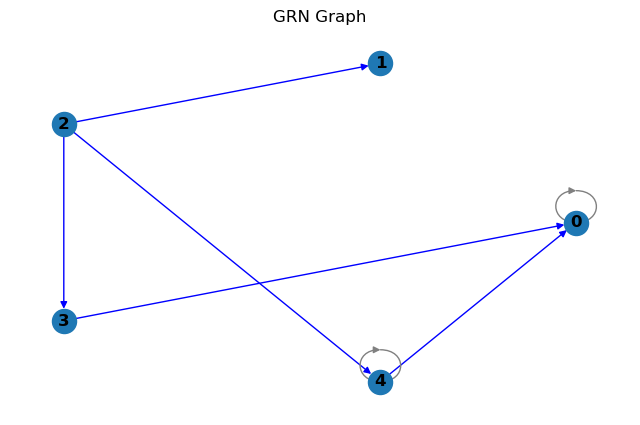

In [3]:
oGRN.plotGraph(test)

### Dynamic simulation
The mRNA concentrations is simulated by diffents laws that transformed the GRN into Stochastic Differential Equations.

The function `simulationODEs` add in the dictionnary the results of the solved differents SDE.
The function `plotSim` shows these results.

In [4]:
oGRN.simulationODEs(test,("massAction","Hill","indirect"),(0,50))
betterPrint(test)

Graph: DiGraph with 5 nodes and 7 edges
genesNb: 5
autoRG: 0.2
duoRG: 0.1
AdjMatrice: [[-1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0. -1.  1.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -1.]]
meanClustering: 0.0
subGraph:
	2-1-3: Fan-Out
	2-1-4: Fan-Out
	2-3-0: Cascade
	2-3-4: Fan-Out
	2-4-0: Cascade
	3-0-4: Fan-In
Coefficients:
	ProtsDeg: [0.12836058899258246, 0.02527889061123068, 0.002149426880922678, 0.14350873303518535, 0.14291694444534955]
	mRNAsDeg: [0.07841031454298024, 0.04185671380192907, 0.0788563345346923, 0.08729813357178151, 0.03248112373757944]
	TranscriptionsRate: [1.25, 1.02, 1.76, 6.33, 1.54]
	TranslationsRate: [72.39, 347.94, 394.77, 79.52, 1.82]
	mRNAAvg: [12.62, 16.18, 17.7, 33.21, 29.05]
	ProtAvg: [6046.18, 115911.77, 255847.07, 14244.57, 278.55]
ODEs: ('massAction', 'Hill', 'indirect')
massActionY: [[12.128348914231516, 12.667532448700086, 12.7263548458374, 12.74271933949463, 13.450599409825815, 15.335515128639189, 16.890144383848934, 18.93939205708911, 

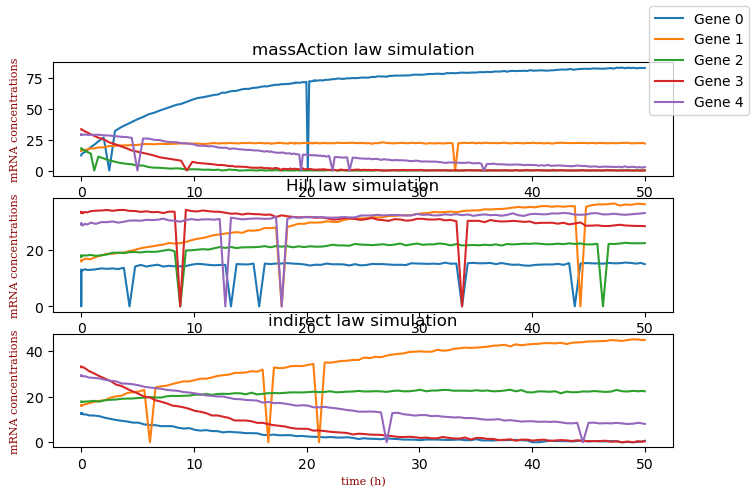

In [5]:
oGRN.plotSim(test)